**Edge Detection**

/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting uint64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


(100, 100, 3) 255 0
(100, 100) 1.0 0.4094313725490196


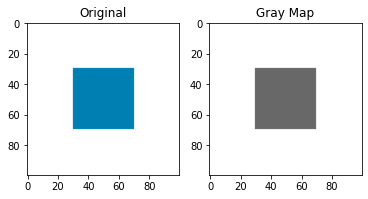

In [ ]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.preprocessing import MinMaxScaler

ones_im = 255*np.ones((100,100,3),dtype=np.uint,order='C')
rcomp = ones_im[:,:,0]
rcomp[50-20:50+20,50-20:50+20]=0
ones_im[:,:,0]=rcomp

gcomp = ones_im[:,:,1]
gcomp[50-20:50+20,50-20:50+20]=128
ones_im[:,:,1]=gcomp

bcomp = ones_im[:,:,2]
bcomp[50-20:50+20,50-20:50+20] = 255*0.7
ones_im[:,:,2] = bcomp

ones_im = skimage.img_as_ubyte(ones_im)
print(ones_im.shape,max(ones_im.ravel()),min(ones_im.ravel()))
figure = plt.figure(1)
plt.subplot(1,2,1)
plt.imshow((ones_im));
plt.title('Original')

plt.subplot(1,2,2)
ones_im = rgb2gray(ones_im/255)
print(ones_im.shape,max(ones_im.ravel()),min(ones_im.ravel()))
plt.imshow(ones_im,cmap='gray', vmin=0, vmax=1);
plt.title('Gray Map')
plt.show()

[[-1  1]
 [-1  1]]
VEdge Filter Size (2, 2) Grad_x shape (100, 100) Max grad:  1.1811372549019608 Min grad:  -1.1811372549019605


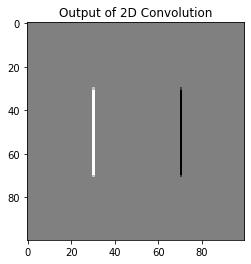

In [15]:
from scipy import signal
from scipy import misc
vedge_filter = np.array([np.array([-1,1]),np.array([-1,1])])
print(vedge_filter)

grad = signal.convolve2d(rgb2gray(ones_im), vedge_filter, boundary='symm',mode='same')
print('VEdge Filter Size',vedge_filter.shape,'Grad_x shape',grad.shape,'Max grad: ',max(grad.ravel()),'Min grad: ',min(grad.ravel()))

plt.imshow(grad,cmap='gray',interpolation='nearest')
ax=plt.gca()
ax.set_title('Output of 2D Convolution')
plt.show()

[[-1 -1]
 [ 1  1]]
VEdge Filter Size (2, 2) Grad_x shape (100, 100) Maxgrad:  1.1811372549019608 Min grad:  -1.1811372549019605


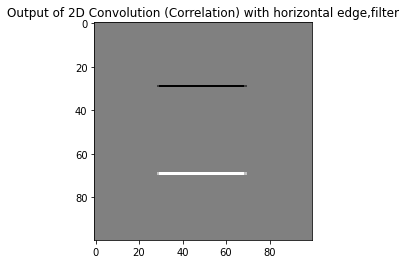

In [18]:
hedge_filter = np.array([np.array([-1,-1]),np.array([1,1])])
print(hedge_filter)
grad = signal.correlate2d(rgb2gray(ones_im), hedge_filter, boundary='symm',mode='same')
print('VEdge Filter Size',vedge_filter.shape,'Grad_x shape',grad.shape,'Maxgrad: ',max(grad.ravel()),'Min grad: ',min(grad.ravel()))
plt.imshow(grad,cmap='gray',interpolation='nearest')
ax=plt.gca()
ax.set_title('Output of 2D Convolution (Correlation) with horizontal edge,filter')
plt.show()

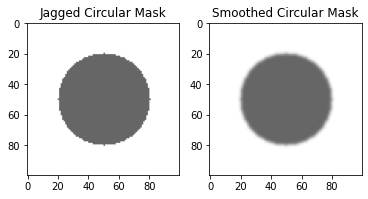

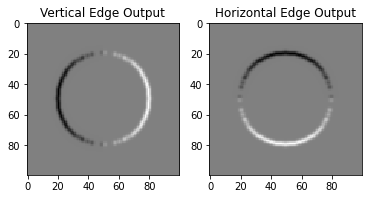

In [20]:
total_rows, total_cols = ones_im.shape
X, Y = np.ogrid[:total_rows, :total_cols]
center_row, center_col = total_rows/2, total_cols/2

dist_from_center = (X - center_row)**2 + (Y - center_col)**2
radius_sq = (60/2)**2
circular_mask = (dist_from_center <= radius_sq)
circ_im = np.ones(ones_im.shape)
circ_im[circular_mask==1] = 0.4
plt.subplot(1,2,1)
plt.imshow(circ_im,cmap='gray', vmin=0, vmax=1);
plt.title('Jagged Circular Mask');

#smoothen the jagged circle via Gaussian smoothing
from scipy import ndimage
circ_im = ndimage.gaussian_filter(circ_im,1)
plt.subplot(1,2,2)
plt.imshow(circ_im,cmap='gray', vmin=0, vmax=1);
plt.title('Smoothed Circular Mask');
plt.show()

grad = signal.correlate2d((circ_im), vedge_filter, boundary='symm', mode='same')
plt.subplot(1,2,1)
plt.imshow(grad,cmap='gray',interpolation='nearest')
ax=plt.gca()
ax.set_title('Vertical Edge Output')
grad = signal.correlate2d((circ_im), hedge_filter, boundary='symm', mode='same')
plt.subplot(1,2,2)
plt.imshow(grad,cmap='gray',interpolation='nearest')
ax=plt.gca()
ax.set_title('Horizontal Edge Output')
plt.show()